# <center> Linear SVR

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.svm import SVR
import random

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

## Параметры

**epsilon** float, default=0.0
Epsilon parameter in the epsilon-insensitive loss function. Note that the value of this parameter depends on the scale of the target variable y. If unsure, set epsilon=0.

Ширина окна.

**tol** float, default=1e-4
Tolerance for stopping criteria.

Критерий остановки 

**C** float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

Порядок регуляризации.

**loss** {‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’epsilon_insensitive’
Specifies the loss function. The epsilon-insensitive loss (standard SVR) is the L1 loss, while the squared epsilon-insensitive loss (‘squared_epsilon_insensitive’) is the L2 loss.

Функция потерь регуляризации.

**fit_intercept** bool, default=True
Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (i.e. data is expected to be already centered).

**intercept_scaling** float, default=1.
When self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic feature weight Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

**dual** bool, default=True
Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

**verbose** int, default=0
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in liblinear that, if enabled, may not work properly in a multithreaded context.

**random_state** int or RandomState instance, default=None
Controls the pseudo random number generation for shuffling the data. Pass an int for reproducible output across multiple function calls. See Glossary.

Порядок последовательности случайных чисел.

**max_iter** int, default=1000
The maximum number of iterations to be run.

Максимальное количество итераций.

## Пример 1

In [3]:
X = (np.random.random(100) * 2 * np.pi).reshape(-1,1)
y = np.array(list(map(lambda x: np.sin(x) + random.random(), X)))

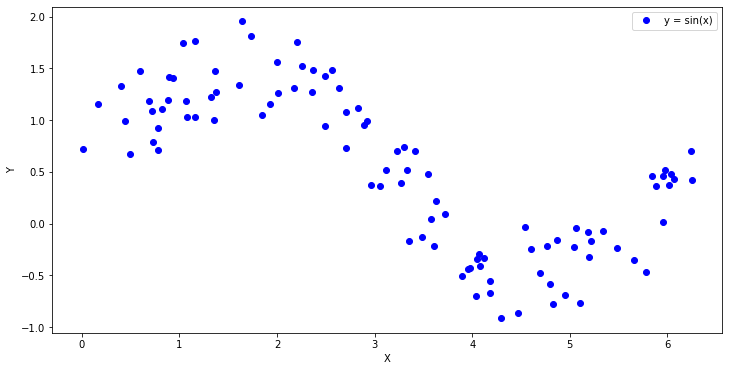

In [4]:
plt.figure(figsize = (12, 6))
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['y = sin(x)'])
plt.show()

In [5]:
svr = LinearSVR(epsilon = 0.1)
svr.fit(X, y)
fitted = svr.predict(X).reshape(-1, 1)

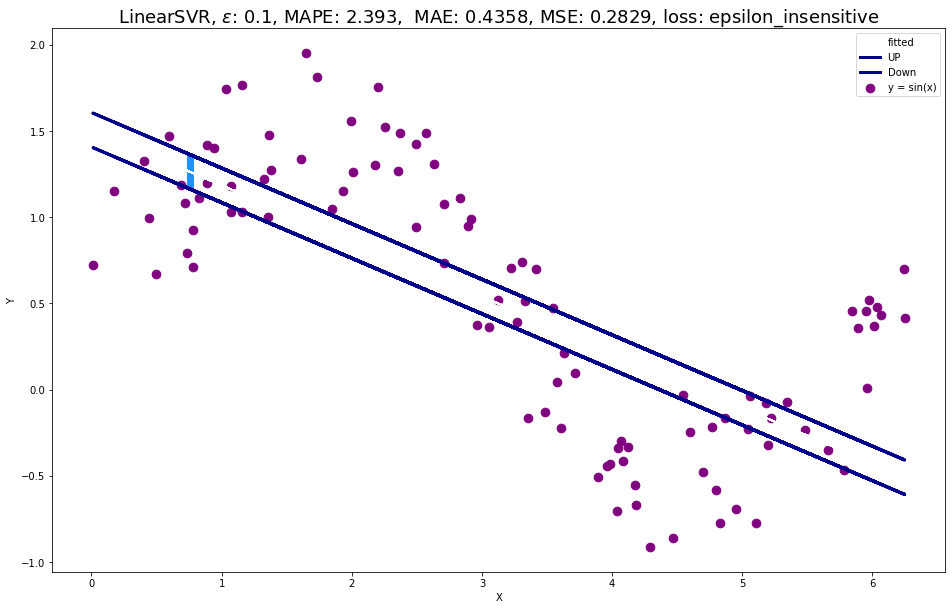

In [6]:
eps = svr.get_params()['epsilon']
fig, ax = plt.subplots(1, 1, figsize = (16, 10))
ax.plot(X, fitted, label = 'fitted', color = 'white')
ax.plot(X, fitted + eps, label = 'UP', color = 'darkblue', linewidth= 3)
ax.plot(X, fitted - eps, label = 'Down', color = 'darkblue', linewidth= 3)
ax.fill_between(X.ravel(),(fitted - eps).ravel(), (fitted + eps).ravel(), color = 'dodgerblue')
ax.scatter(X, y, color = 'purple', label = 'y = sin(x)', s = 75)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(fr'LinearSVR, $\varepsilon$: {eps}, MAPE: {mape(fitted, y):.4},  MAE: {MAE(fitted, y):.4}, MSE: {MSE(fitted, y):.4}, loss: {svr.get_params()["loss"]}', fontsize = 18)
ax.legend()
plt.show()

In [36]:
svr = LinearSVR(epsilon = 0.5)
svr.fit(X, y)
fitted = svr.predict(X).reshape(-1, 1)

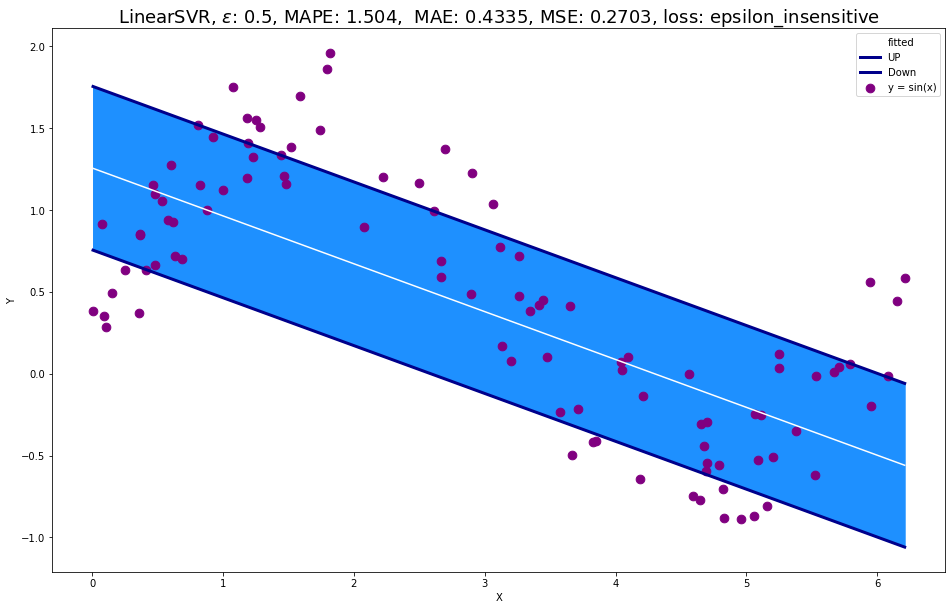

In [37]:
eps = svr.get_params()['epsilon']
fig, ax = plt.subplots(1, 1, figsize = (16, 10))
ax.plot(X, fitted, label = 'fitted', color = 'white')
ax.plot(X, fitted + eps, label = 'UP', color = 'darkblue', linewidth= 3)
ax.plot(X, fitted - eps, label = 'Down', color = 'darkblue', linewidth= 3)
ax.fill_between(X.ravel(),(fitted - eps).ravel(), (fitted + eps).ravel(), color = 'dodgerblue')
ax.scatter(X, y, color = 'purple', label = 'y = sin(x)', s = 75)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(fr'LinearSVR, $\varepsilon$: {eps}, MAPE: {mape(fitted, y):.4},  MAE: {MAE(fitted, y):.4}, MSE: {MSE(fitted, y):.4}, loss: {svr.get_params()["loss"]}', fontsize = 18)
ax.legend()
plt.show()

In [38]:
svr = LinearSVR(epsilon = 1.0)
svr.fit(X, y)
fitted = svr.predict(X).reshape(-1, 1)

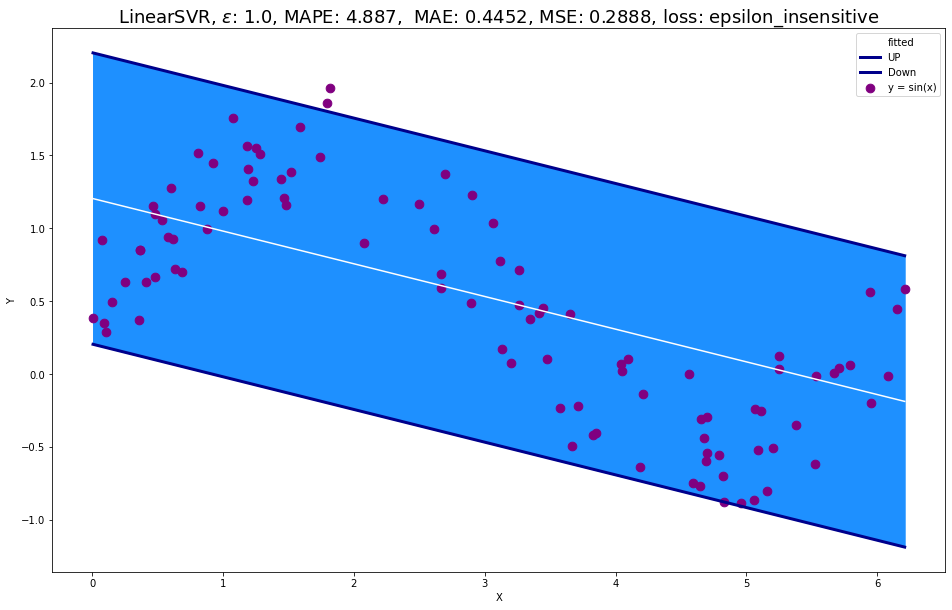

In [39]:
eps = svr.get_params()['epsilon']
fig, ax = plt.subplots(1, 1, figsize = (16, 10))
ax.plot(X, fitted, label = 'fitted', color = 'white')
ax.plot(X, fitted + eps, label = 'UP', color = 'darkblue', linewidth= 3)
ax.plot(X, fitted - eps, label = 'Down', color = 'darkblue', linewidth= 3)
ax.fill_between(X.ravel(),(fitted - eps).ravel(), (fitted + eps).ravel(), color = 'dodgerblue')
ax.scatter(X, y, color = 'purple', label = 'y = sin(x)', s = 75)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(fr'LinearSVR, $\varepsilon$: {eps}, MAPE: {mape(fitted, y):.4},  MAE: {MAE(fitted, y):.4}, MSE: {MSE(fitted, y):.4}, loss: {svr.get_params()["loss"]}', fontsize = 18)
ax.legend()
plt.show()

## Пример 2

Рассмотрим набор данных: https://www.kaggle.com/quantbruce/real-estate-price-prediction

In [13]:
data = pd.read_csv('Real_estate.csv', index_col = 0)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
data.shape

(414, 7)

In [15]:
y = data['Y house price of unit area'].values
X = data.drop(columns = ['Y house price of unit area']).values

Разделим на **train** и **test**:

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [172]:
made_eps = []
for eps in range(0, 300, 5):
    model = LinearSVR(epsilon = eps, loss="squared_epsilon_insensitive", max_iter=10000)
    model.fit(X_train, y_train)
    made_eps.append(mape(model.predict(X_test), y_test))

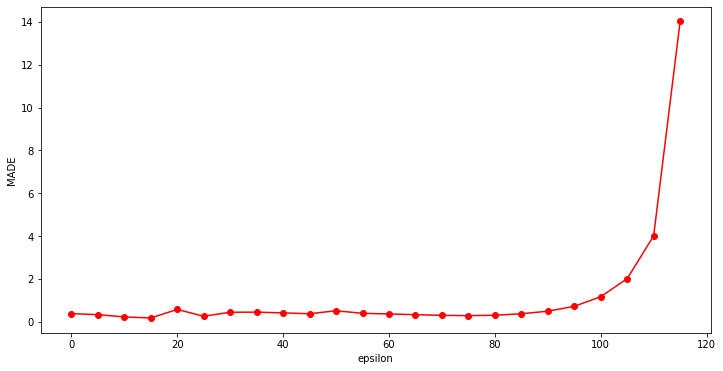

In [175]:
plt.figure(figsize = (12, 6))
plt.plot(list(range(0, 300, 5)), made_eps, 'ro')
plt.plot(list(range(0, 300, 5)), made_eps, 'r')
plt.xlabel('epsilon')
plt.ylabel('MADE')
plt.show()

In [22]:
d = ["squared_epsilon_insensitive", "epsilon_insensitive"]

In [23]:
a = []
b = []
for i in d:
    for epsilon in np.arange(0, 1.1, 0.1):
        model = LinearSVR(epsilon = epsilon, max_iter=10000, loss = i)
        model.fit(X_train, y_train)
        a.append([MSE(model.predict(X_train), y_train), MSE(model.predict(X_test), y_test), mape(model.predict(X_train), y_train), mape(model.predict(X_test), y_test)])
        b.append(f'loss: {model.get_params()["loss"]}, eps: {model.get_params()["epsilon"]:.3}')

In [24]:
results = pd.DataFrame(np.array(a), columns=['MSE: train', 'MSE: test', 'MAPE: train', 'MAPE: test'], index = b)
results

,MSE: train,MSE: test,MAPE: train,MAPE: test
"loss: squared_epsilon_insensitive, eps: 0.0",153.070115,116.284130,0.235621,0.218122
"loss: squared_epsilon_insensitive, eps: 0.1",221.821907,185.907068,0.543445,0.545716
"loss: squared_epsilon_insensitive, eps: 0.2",95.384635,61.349081,1.097488,0.287803
"loss: squared_epsilon_insensitive, eps: 0.3",287.596393,253.868738,0.291051,0.279767
"loss: squared_epsilon_insensitive, eps: 0.4",112.278926,79.881234,0.356053,0.330361
"loss: squared_epsilon_insensitive, eps: 0.5",93.881942,60.554463,0.391627,0.192941
"loss: squared_epsilon_insensitive, eps: 0.6",118.436425,88.227977,0.224689,0.204490
"loss: squared_epsilon_insensitive, eps: 0.7",109.480235,77.453202,0.405618,0.272700
"loss: squared_epsilon_insensitive, eps: 0.8",97.398919,65.439164,0.197753,0.168246
"loss: squared_epsilon_insensitive, eps: 0.9",96.267064,62.258220,0.236083,0.184006


# <center> svm.SVR

Параметры
----------
`kernel (ядро)` : `{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}`, default=`'rbf'`

`degree` : int, default=`3`, используется, только если `kernel = 'poly'`

`gamma` : `{'scale', 'auto'}` или float, default=`'scale'`: позволяет управлять 'плавностью' ядра, в частности ее пиков. работает для  `'rbf'`, `'poly'` и `'sigmoid'`.

`coef0` : float, default=`0.0`: свободный член для `poly` и `sigmoid`

`tol` : float, default=`1e-3`: критерий останова

`C` : float, default=`1.0`: параметр регуляризации

`epsilon` : float, default=`0.1`: ширина окна в SVR

`shrinking` : bool, default=`True`: не проходили, но пытается удалять некоторые пограничные элементы на ширине окна, упрощая задачу оптимизации. можно отключить

`max_iter` : int, default=`-1` (no limit) - максимальное число итераций

`cache_size` : float, default=`200`

`verbose` : bool, default=`False`: можно посмотреть процесс обучения

Атрибуты
----------
`support_ :` ndarray of shape `(n_SV,)`: индексы SV

`support_vectors_` : ndarray of shape `(n_SV, n_features)`: SV

`dual_coef_` : ndarray of shape `(1, n_SV)`: коэффициенты SV

`fit_status_` : int, `0` - без ошибок при обучении, `1` - в противном случае.

`intercept_` : ndarray of shape `(1,)`: константы

## Пример 1

In [2]:
X = (np.sort(np.random.random(100) * 2 * np.pi)).reshape(-1,1)
y = np.array(list(map(lambda x: np.sin(x) + random.random(), X)))

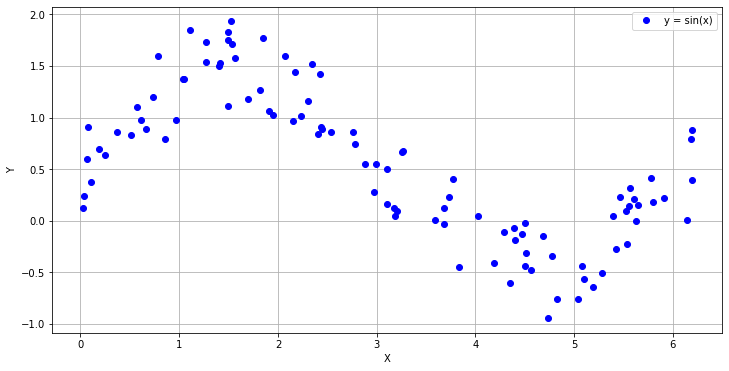

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax.plot(X, y, 'bo', label = 'y = sin(x)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()
plt.show()

## Default `kernel = rgb`

In [4]:
svr = SVR(epsilon = 0.1)
svr.fit(X, y)
fitted = svr.predict(X).reshape(-1, 1)

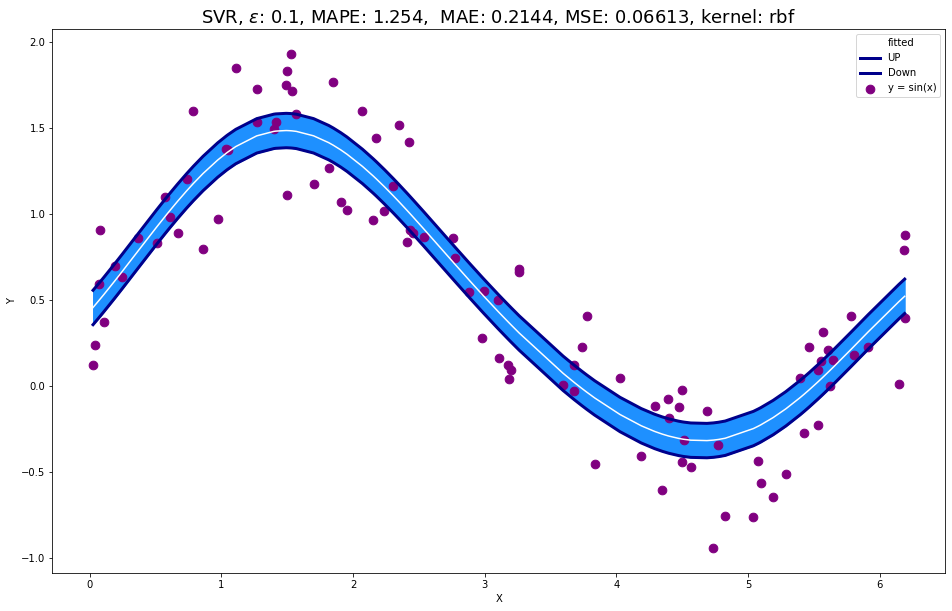

In [7]:
eps = svr.get_params()['epsilon']
fig, ax = plt.subplots(1, 1, figsize = (16, 10))
ax.plot(X, fitted, label = 'fitted', color = 'white')
ax.plot(X, fitted + eps, label = 'UP', color = 'darkblue', linewidth= 3)
ax.plot(X, fitted - eps, label = 'Down', color = 'darkblue', linewidth= 3)
ax.fill_between(X.ravel(),(fitted - eps).ravel(), (fitted + eps).ravel(), color = 'dodgerblue')
ax.scatter(X, y, color = 'purple', label = 'y = sin(x)', s = 75)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(fr'SVR, $\varepsilon$: {eps}, MAPE: {mape(fitted, y):.4},  MAE: {MAE(fitted, y):.4}, MSE: {MSE(fitted, y):.4}, kernel: {svr.get_params()["kernel"]}', fontsize = 18)
ax.legend()
plt.show()

## Linear

In [8]:
svr = SVR(epsilon = 0.1, kernel = 'linear')
svr.fit(X, y)
fitted = svr.predict(X).reshape(-1, 1)

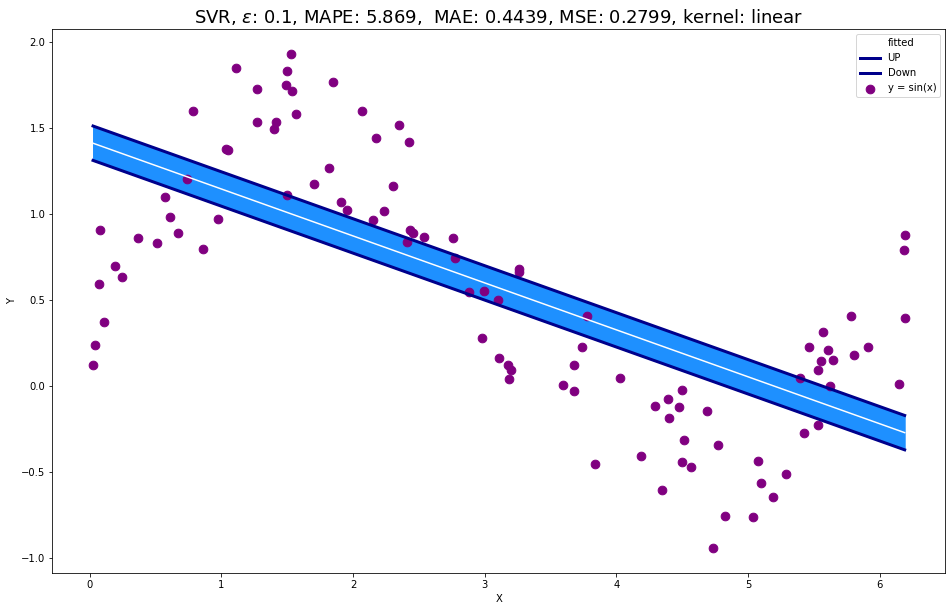

In [9]:
eps = svr.get_params()['epsilon']
fig, ax = plt.subplots(1, 1, figsize = (16, 10))
ax.plot(X, fitted, label = 'fitted', color = 'white')
ax.plot(X, fitted + eps, label = 'UP', color = 'darkblue', linewidth= 3)
ax.plot(X, fitted - eps, label = 'Down', color = 'darkblue', linewidth= 3)
ax.fill_between(X.ravel(),(fitted - eps).ravel(), (fitted + eps).ravel(), color = 'dodgerblue')
ax.scatter(X, y, color = 'purple', label = 'y = sin(x)', s = 75)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(fr'SVR, $\varepsilon$: {eps}, MAPE: {mape(fitted, y):.4},  MAE: {MAE(fitted, y):.4}, MSE: {MSE(fitted, y):.4}, kernel: {svr.get_params()["kernel"]}', fontsize = 18)
ax.legend()
plt.show()

## Sigmoid

In [10]:
svr = SVR(epsilon = 0.5, kernel = 'sigmoid', coef0 = 3)
svr.fit(X, y)
fitted = svr.predict(X).reshape(-1, 1)

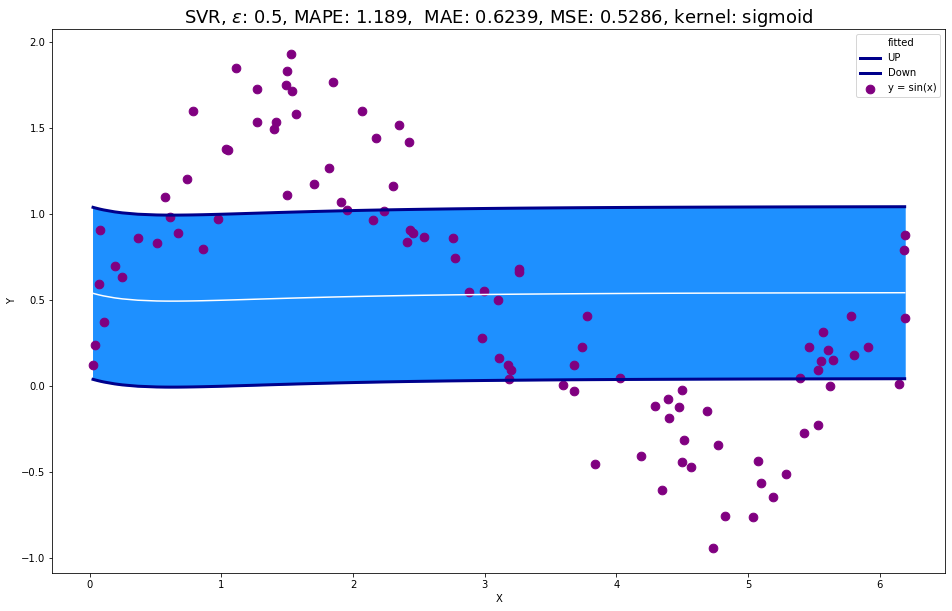

In [11]:
eps = svr.get_params()['epsilon']
fig, ax = plt.subplots(1, 1, figsize = (16, 10))
ax.plot(X, fitted, label = 'fitted', color = 'white')
ax.plot(X, fitted + eps, label = 'UP', color = 'darkblue', linewidth= 3)
ax.plot(X, fitted - eps, label = 'Down', color = 'darkblue', linewidth= 3)
ax.fill_between(X.ravel(),(fitted - eps).ravel(), (fitted + eps).ravel(), color = 'dodgerblue')
ax.scatter(X, y, color = 'purple', label = 'y = sin(x)', s = 75)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(fr'SVR, $\varepsilon$: {eps}, MAPE: {mape(fitted, y):.4},  MAE: {MAE(fitted, y):.4}, MSE: {MSE(fitted, y):.4}, kernel: {svr.get_params()["kernel"]}', fontsize = 18)
ax.legend()
plt.show()

### Если выберем чересчур большую ширину окна

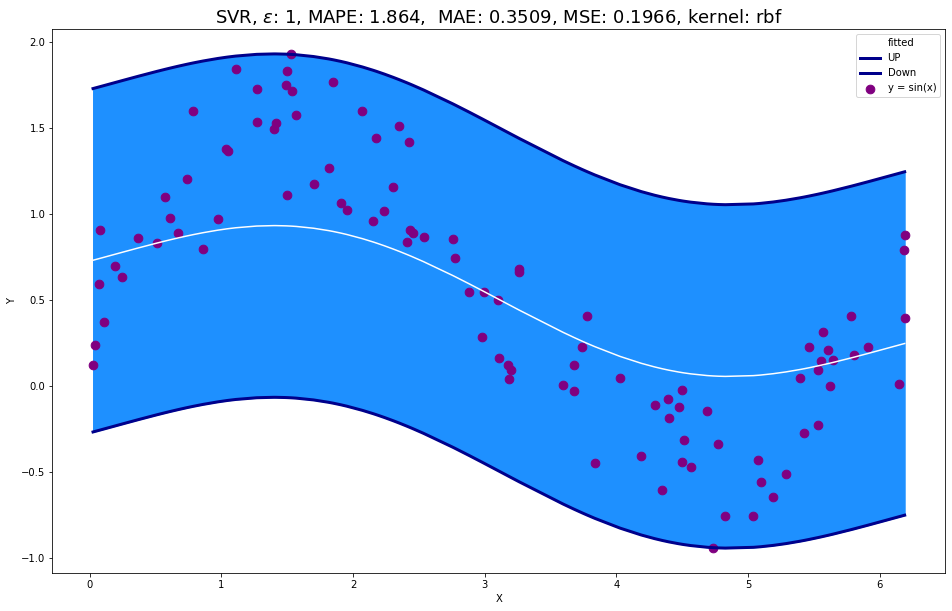

In [12]:
svr = SVR(epsilon = 1)
svr.fit(X, y)
fitted = svr.predict(X).reshape(-1, 1)
eps = svr.get_params()['epsilon']
fig, ax = plt.subplots(1, 1, figsize = (16, 10))
ax.plot(X, fitted, label = 'fitted', color = 'white')
ax.plot(X, fitted + eps, label = 'UP', color = 'darkblue', linewidth= 3)
ax.plot(X, fitted - eps, label = 'Down', color = 'darkblue', linewidth= 3)
ax.fill_between(X.ravel(),(fitted - eps).ravel(), (fitted + eps).ravel(), color = 'dodgerblue')
ax.scatter(X, y, color = 'purple', label = 'y = sin(x)', s = 75)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(fr'SVR, $\varepsilon$: {eps}, MAPE: {mape(fitted, y):.4},  MAE: {MAE(fitted, y):.4}, MSE: {MSE(fitted, y):.4}, kernel: {svr.get_params()["kernel"]}', fontsize = 18)
ax.legend()
plt.show()

## Пример 2

In [16]:
y = data['Y house price of unit area'].values
X = data.drop(columns = ['Y house price of unit area']).values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
model = SVR(epsilon = 0, max_iter=10000)
model.fit(X_train, y_train)
print(f" MSE test: \t{MSE(model.predict(X_test), y_test)}")
print(f" MAPE train: \t{mape(model.predict(X_train), y_train)}")
print(f" MAPE test: \t{mape(model.predict(X_test), y_test)}")

 MSE test: 	77.11132327274012
 MAPE train: 	0.18482756203905593
 MAPE test: 	0.1806823377031623


In [19]:
d = ['linear', 'poly', 'rbf', 'sigmoid']

In [20]:
a = []
b = []
for i in d:
    for epsilon in np.arange(0, 1.1, 0.1):
        model = SVR(epsilon = epsilon, max_iter=10000, kernel = i)
        model.fit(X_train, y_train)
        a.append([MSE(model.predict(X_train), y_train), MSE(model.predict(X_test), y_test), mape(model.predict(X_train), y_train), mape(model.predict(X_test), y_test)])
        b.append(f'kernel: {model.get_params()["kernel"]}, eps: {model.get_params()["epsilon"]:.3}')

In [21]:
results = pd.DataFrame(np.array(a), columns=['MSE: train', 'MSE: test', 'MAPE: train', 'MAPE: test'], index = b)
results

,MSE: train,MSE: test,MAPE: train,MAPE: test
"kernel: linear, eps: 0.0",274.599376,240.718855,0.377016,0.352439
"kernel: linear, eps: 0.1",7619.474822,7487.421752,2.523815,0.738035
"kernel: linear, eps: 0.2",4232.437442,4151.905525,1.249326,0.804629
"kernel: linear, eps: 0.3",225.483316,197.387001,0.339288,0.324504
"kernel: linear, eps: 0.4",233.190850,207.485775,0.333962,0.319646
"kernel: linear, eps: 0.5",40794.558169,40309.740909,1.233659,0.839507
"kernel: linear, eps: 0.6",250.626596,221.835805,0.375084,0.360881
"kernel: linear, eps: 0.7",264.469549,231.768974,0.373997,0.349694
"kernel: linear, eps: 0.8",3330.348037,3239.610091,2.519286,1.586950
"kernel: linear, eps: 0.9",213.417871,180.056027,0.353858,0.332843
